# 3-3 Neural Network Model

In [1]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

### 학습과 평가에 사용할 데이터셋을 생성
사이킷런의 make_blobs() 함수를 이용하여 데이터를 2차원 벡터 형태로 만들었다.  
학습 데이터셋에는 80개, 테스트 데이터셋에는 20개의 2차원 벡터 데이터로 만들었다.  

이 데이터셋은 4개의 클러스터를 만들었다.

In [2]:
n_dim =2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[ [1,1], [-1,-1], [1,-1], [-1,1] ],
                              shuffle = True, cluster_std=0.2)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[ [1,1], [-1,-1], [1,-1], [-1,1] ],
                              shuffle = True, cluster_std=0.2)

### Label 설정

In [3]:
def label_map(y_, from_, to_):
    y=np.copy(y_)
    for f in from_:
        y[y_ ==f] = to_
    return y

y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)


### 데이터의 형태 시각화

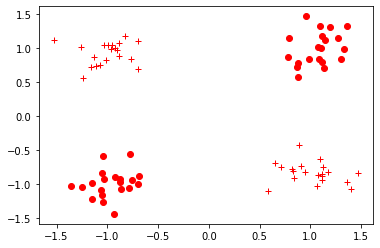

In [4]:
def vis_data(x,y = None, c='r'):
    if y is None:
        y=[None]*len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0],x_[1], '*', markerfacecolor='none', markerdgecolor=c)
        else:
            plt.plot(x_[0],x_[1], c+'o' if y_ == 0 else c+'+')
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

넘파이 형식 데이터를 파이토치 텐서로 변경

In [5]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [6]:
class NeuralNet(torch.nn.Module):
    
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size= input_size
        self.hidden_size= hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
    
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        
        return output       

In [7]:
model = NeuralNet(2,5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs=3600
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before Training, test loss is {}".format(test_loss_before.item()))

Before Training, test loss is 0.7080998420715332


In [9]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 400 == 0:
        print("Train loss at {} is {}".format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()
    

Train loss at 0 is 0.7107168436050415
Train loss at 400 is 0.4363853931427002
Train loss at 800 is 0.2125815451145172
Train loss at 1200 is 0.10976799577474594
Train loss at 1600 is 0.0690067857503891
Train loss at 2000 is 0.049167413264513016
Train loss at 2400 is 0.037683725357055664
Train loss at 2800 is 0.030308391898870468
Train loss at 3200 is 0.025223230943083763


In [10]:
model.eval()
test_loss =criterion(model(x_test).squeeze(), y_test)
print("After Training, test loss is {}".format(test_loss.item()))

After Training, test loss is 0.0184573195874691


In [11]:
torch.save(model.state_dict(), './model.pt')
print("state_dict format of the model: {}".format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 0.3708, -0.4736],
        [ 0.5171, -0.3426],
        [-1.4676, -2.2531],
        [ 2.0331,  0.7855],
        [ 1.8540, -1.9442]])), ('linear_1.bias', tensor([ 0.0911, -0.2750, -0.2345,  0.7581, -0.3856])), ('linear_2.weight', tensor([[ 0.2320,  0.3936, -2.5239, -2.2006,  2.5563]])), ('linear_2.bias', tensor([2.8104]))])


In [13]:
new_model = NeuralNet(2,5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print("벡터 [-1, 1]이 레이블 1을 가질 확률은 {}".format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9432337880134583
